<a href="https://colab.research.google.com/github/shanmukhareddygali/Health-Insurance-Cross-Sell-Prediction-using-Machine-Learning/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  HEALTH INSURANCE CROSS SELL PREDICTION



##### **Project Type**    - Classification
##### **Contribution**    - Individual - Shanmukha Reddy



# **Project Summary -**

I have information about demographics (gender, age, region code type), vehicles (vehicle age, damage), policies (premium, sourcing channel), and so on to predict whether the customer would be interested in Vehicle insurance. After loading our dataset, I initially checked for null values and duplicates. There were no null values and duplicates so treatment of such was not required. In data preprocessing, I handled outliers,did feature selection,handled imbalances in dataset,splitting dataset and applied feature scaling techniques to  our data make it easier to process ML algorithms.

Next I implemented three machine learning algorithms namely, 'LogisticRegression', 'RandomForestClassifier','XGBClassifier'.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,precision_score, recall_score, f1_score,accuracy_score,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Import dataset
df = pd.read_csv("/content/drive/My Drive/health insurance cross sell.csv")    #read_csv functions reads csv file

### Dataset First View

In [4]:
# Dataset First Look
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count

df.shape    #shape function returns no of rows and columns

(381109, 12)

### Dataset Information

In [6]:
# Dataset Info
df.info() #info function gives data types and null values information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()   #duplicated function gives duplicated values

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### What did you know about your dataset?

The dataset contains 381109 rows and 12 columns.There are three columns with object datatype which are Gender,Vehical age and vehical damage,six columns with Int data type which are Id,Age,driving license,previously insured,vintage and response and three columns with float data type which are Region code,Annual premium and Policy sales channel.There are no missing values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns #gives name of all columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

id : Unique ID for the customer

Gender : Gender of the customer

Age : Age of the customer

Driving_License : 0 - Customer does not have DL,1 - Customer already has DL

Region_Code : Unique code for the region of the customer

Previously_Insured : 1 - Customer already has Vehicle Insurance, 0-Customer doesn't have Vehicle Insurance

Vehicle_Age : Age of the Vehicle

Vehicle_Damage : 1 - Customer got his/her vehicle damaged in the past. 0 -Customer didn't get his/her
vehicle damaged in the past.

Annual_Premium : The amount customer needs to pay as premium in the year

PolicySalesChannel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage : Number of Days, Customer has been associated with the company

Response : 1 - Customer is interested, 0 - Customer is not interested

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for gender.
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
# Check Unique Values for Vehival age.
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [13]:
# Check Unique Values for Vehical Damage.
df['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
#check unique values in all columns
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


### What all manipulations have you done and insights you found?

After loading the dataset, I checked for missing values in a dataset.There is no missing values in the dataset.So there is no need for any manipulation at this stage.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

1.How age of the customers distributed?

<Axes: xlabel='Age', ylabel='Count'>

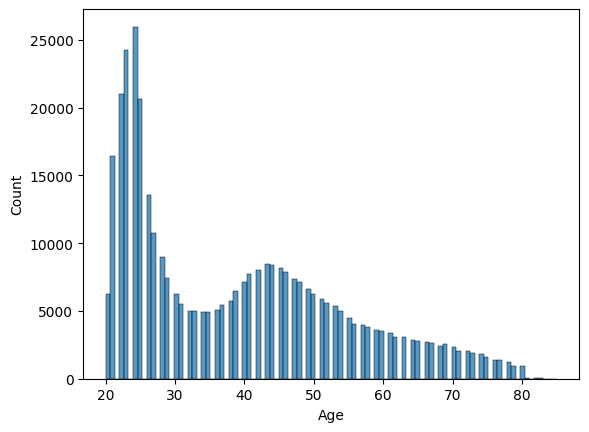

In [16]:
# Chart - 1 visualization code
fig1 = sns.histplot(df['Age'])
fig1

##### 1. Why did you pick the specific chart?

Histograms are widely used for understanding the distribution of a continuous variable.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.More number of customers are present between age 20 and 30.

2.Customers from age group of 40 to 50 are more than age group 30 - 40.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 2

2.How many customers accepted plan ?

In [17]:
# Chart - 2 visualization code
fig2 = df['Response'].value_counts()
fig2

0    334399
1     46710
Name: Response, dtype: int64

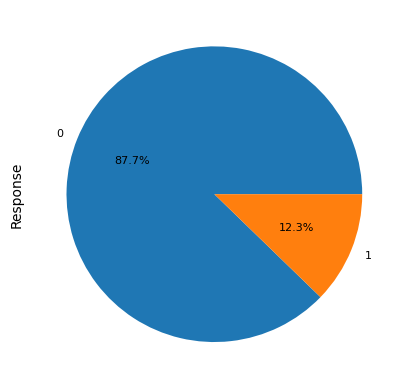

In [18]:
#plot pie chart
fig2.plot.pie(labels = fig2.index ,autopct = '%.1f%%',fontsize=8,labeldistance=1.1)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are a type of data visualization that represent data in a circular graph, where each slice of the pie represents a proportion of the whole. Pie charts are useful for conveying relative proportions of different categories or components within a dataset.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.87% of customers didn't accepted the offer.

2.Only 12.3% customers accepted the offer.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 3

3.How many customers are previously taken vehical insurance?

In [19]:
# Chart - 3 visualization code
fig3 = df['Previously_Insured'].value_counts()
fig3

0    206481
1    174628
Name: Previously_Insured, dtype: int64

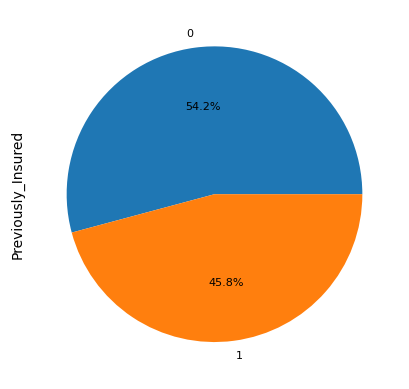

In [20]:
#plot pie chart
fig3.plot.pie(labels = fig3.index ,autopct = '%.1f%%',fontsize=8,labeldistance=1.1)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are a type of data visualization that represent data in a circular graph, where each slice of the pie represents a proportion of the whole. Pie charts are useful for conveying relative proportions of different categories or components within a dataset.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.54% of customers dont have any previous vehical insurance

2.45.8% of customers have previous vehical insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 4

4.How many customers have driving license ?

In [21]:
# Chart - 4 visualization code
fig4 = df['Driving_License'].value_counts()
fig4


1    380297
0       812
Name: Driving_License, dtype: int64

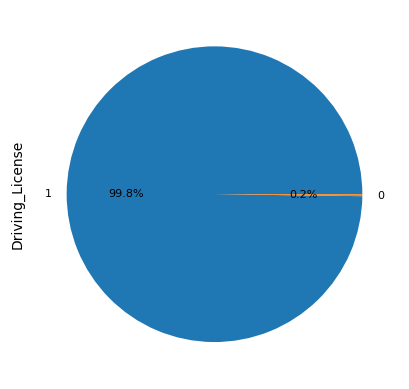

In [22]:
#plot pie chart
fig4.plot.pie(labels = fig4.index ,autopct = '%.1f%%',fontsize=8,labeldistance=1.1)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are a type of data visualization that represent data in a circular graph, where each slice of the pie represents a proportion of the whole. Pie charts are useful for conveying relative proportions of different categories or components within a dataset.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.99.8% customers have the driving license.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight has no impact in analysis.

#### Chart - 5

5.Gender vs Response ?

In [23]:
# Chart - 5 visualization code
df.groupby(['Gender','Response']).size()


Gender  Response
Female  0           156835
        1            18185
Male    0           177564
        1            28525
dtype: int64

In [24]:
#find percentages
x = df.groupby(['Gender','Response']).size()*100/df.groupby('Gender').size()
fig5 = x.unstack()
fig5

Response,0,1
Gender,,
Female,89.609759,10.390241
Male,86.158893,13.841107


<Axes: xlabel='Gender'>

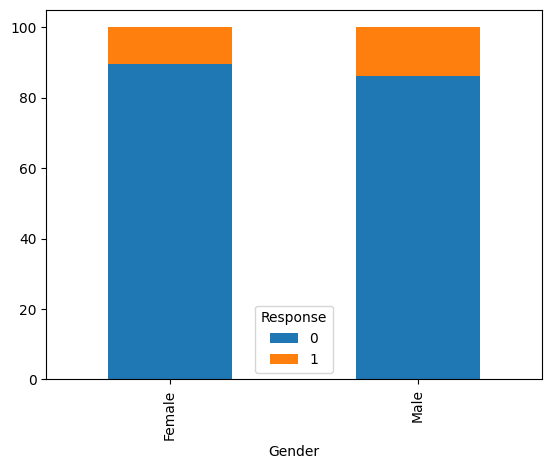

In [25]:
#plot stacked bar chart
fig5.plot(kind = 'bar',stacked = True)

##### 1. Why did you pick the specific chart?

A stacked bar chart is a type of bar chart that represents multiple categories as segments within each bar. Each bar represents a total, and the segments of the bar represent the proportion of that total contributed by different categories. This chart is useful for visualizing the composition of a whole and the contribution of individual components.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.The probability of accepting plan by both genders customers are similar.

2.The probability of rejecting plan by both genders customers are similar.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 6

6.Vehical age vs Response?

In [26]:
# Chart - 6 visualization code
x = df.groupby(['Vehicle_Age','Response']).size()*100/df.groupby('Vehicle_Age').size()
fig6 = x.unstack()
fig6

Response,0,1
Vehicle_Age,,
1-2 Year,82.624453,17.375547
< 1 Year,95.629483,4.370517
> 2 Years,70.625351,29.374649


<Axes: xlabel='Vehicle_Age'>

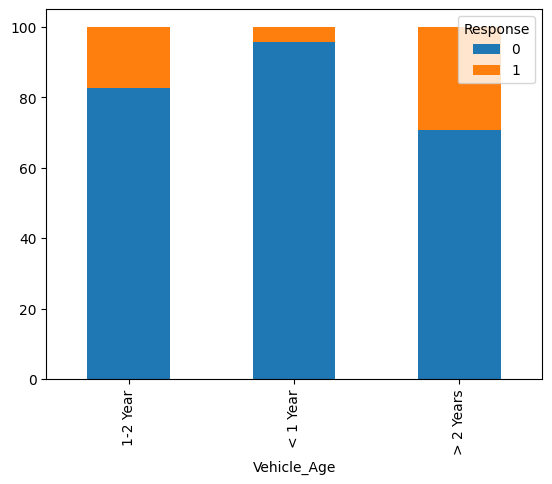

In [27]:
#plot stacked bar chart
fig6.plot(kind = 'bar',stacked = True)

##### 1. Why did you pick the specific chart?

A stacked bar chart is a type of bar chart that represents multiple categories as segments within each bar. Each bar represents a total, and the segments of the bar represent the proportion of that total contributed by different categories. This chart is useful for visualizing the composition of a whole and the contribution of individual components.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.30% of Customers with vehicals age more than 2 years  are accepting plan.

2.95% of Customers with vehicals age less than year are not accepting plan .

3.17% of Customers in vehicals age between 1 and 2  are accepting plan.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 7

7.Vehical Damage vs Response?

In [28]:
# Chart - 7 visualization code
x = df.groupby(['Vehicle_Damage','Response']).size()*100/df.groupby('Vehicle_Damage').size()
fig7 = x.unstack()
fig7

Response,0,1
Vehicle_Damage,,
No,99.479586,0.520414
Yes,76.234454,23.765546


<Axes: xlabel='Vehicle_Damage'>

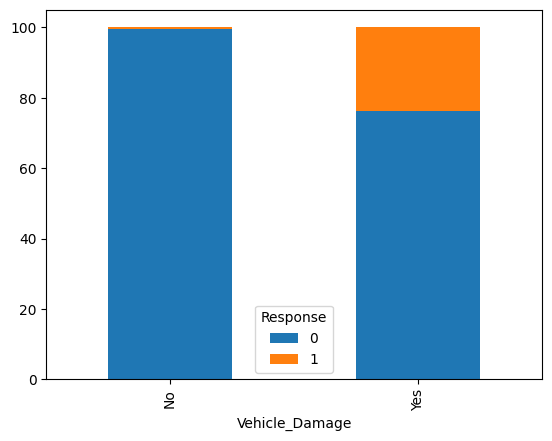

In [29]:
#plot stacked bar chart
fig7.plot(kind = 'bar',stacked = True)

##### 1. Why did you pick the specific chart?

A stacked bar chart is a type of bar chart that represents multiple categories as segments within each bar. Each bar represents a total, and the segments of the bar represent the proportion of that total contributed by different categories. This chart is useful for visualizing the composition of a whole and the contribution of individual components.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.99.7% of customers without vehical damage are not accepting plan.

2.23.7% of customers with vehical damage is accepting plan

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 8

8.Age vs Response?

<Axes: xlabel='Age', ylabel='Count'>

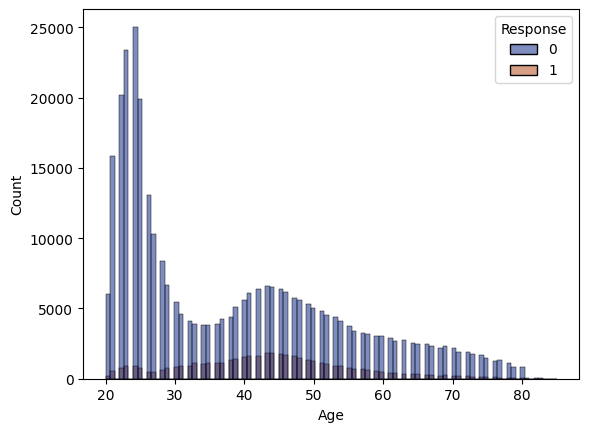

In [30]:
# Chart - 8 visualization code
sns.histplot(df,x = 'Age',hue = 'Response',palette='dark')

##### 1. Why did you pick the specific chart?

Histograms are widely used for understanding the distribution of a continuous variable.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.Majority of the Customers between age of 20-30 and greater than 60 are not accepting plan.

2.Customers between age of 40-50 are accepting plan compare to all age groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 9

9.Previously Insured vs Response?

In [31]:
# Chart - 9 visualization code
x = df.groupby(['Previously_Insured','Response']).size()*100/df.groupby('Previously_Insured').size()
fig9 = x.unstack()
fig9

Response,0,1
Previously_Insured,,
0,77.454584,22.545416
1,99.909522,0.090478


<Axes: xlabel='Previously_Insured'>

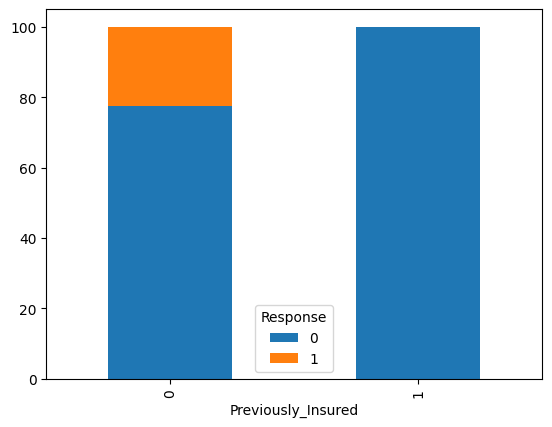

In [32]:
#plot bar chart
fig9.plot(kind = 'bar',stacked = True)

##### 1. Why did you pick the specific chart?

A stacked bar chart is a type of bar chart that represents multiple categories as segments within each bar. Each bar represents a total, and the segments of the bar represent the proportion of that total contributed by different categories. This chart is useful for visualizing the composition of a whole and the contribution of individual components.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.Customers who are previously insuranced are not accepting the plan.

2.Only 22.5% of customers who are not insured previously are accepting the plan.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 10

10.Vintage vs Response ?

<Axes: xlabel='Vintage', ylabel='Count'>

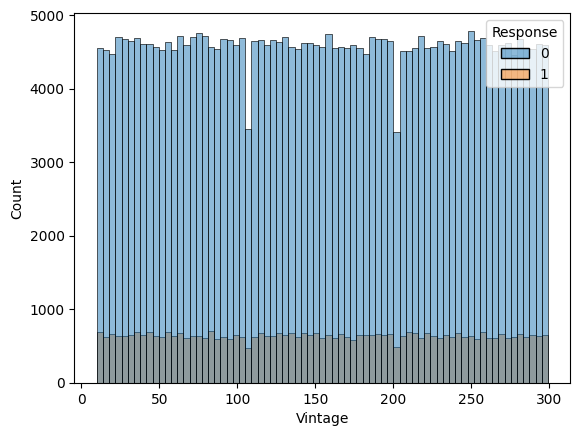

In [33]:
# Chart - 10 visualization code
sns.histplot(df,x= 'Vintage',hue = 'Response')

##### 1. Why did you pick the specific chart?

Histograms are widely used for understanding the distribution of a continuous variable.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.From the above distribution,there is nothing interpretable,because it is uniform distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight has no impact.

#### Chart - 11

11.Age vs Previously Insured?

<Axes: xlabel='Age', ylabel='Count'>

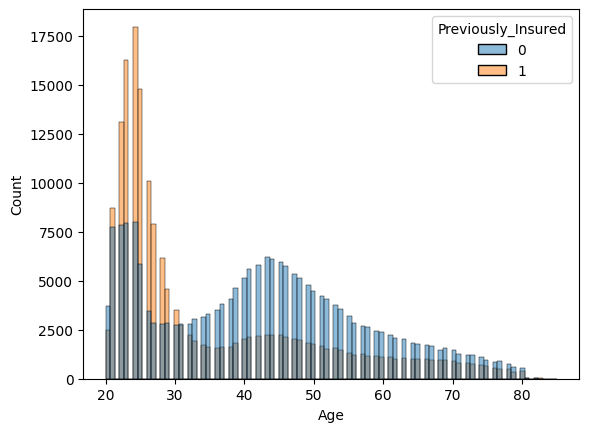

In [34]:
# Chart - 10 visualization code
sns.histplot(df,x= 'Age',hue = 'Previously_Insured')

##### 1. Why did you pick the specific chart?

Histograms are widely used for understanding the distribution of a continuous variable.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.More number of customers of age group  between 20-30 are previously insuranced.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 12

12.Vehical_Age vs previously_Insuranced?

In [35]:
# Chart - 12 visualization code
x = df.groupby(['Vehicle_Age','Previously_Insured']).size()*100/df.groupby('Vehicle_Age').size()
fig12 = x.unstack()
fig12

Previously_Insured,0,1
Vehicle_Age,,
1-2 Year,67.389025,32.610975
< 1 Year,33.697644,66.302356
> 2 Years,99.712626,0.287374


<Axes: xlabel='Vehicle_Age'>

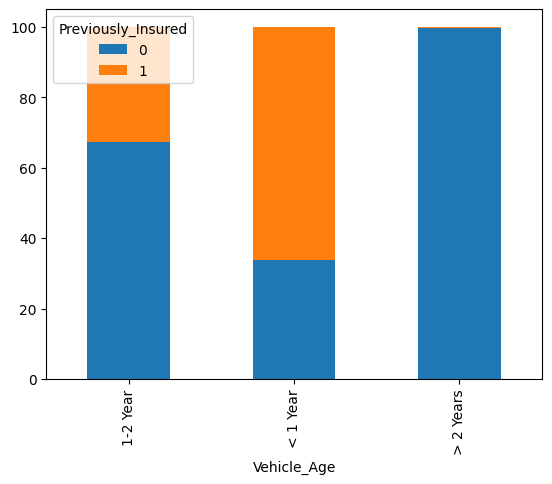

In [36]:
#plot stacked bar chart
fig12.plot(kind = 'bar',stacked = True)

##### 1. Why did you pick the specific chart?

A stacked bar chart is a type of bar chart that represents multiple categories as segments within each bar. Each bar represents a total, and the segments of the bar represent the proportion of that total contributed by different categories. This chart is useful for visualizing the composition of a whole and the contribution of individual components.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.66% of customers whose vehical age is less than one year are already insuranced.

2.99% of customers whose vehical age is more than two years are not insuranced.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 13

13.Gender vs Previously insuranced?

In [37]:
# Chart - 13 visualization code
x = df.groupby(['Vehicle_Damage','Previously_Insured']).size()*100/df.groupby('Vehicle_Damage').size()
fig13 = x.unstack()
fig13

Previously_Insured,0,1
Vehicle_Damage,,
No,12.713571,87.286429
Yes,94.843384,5.156616


<Axes: xlabel='Vehicle_Damage'>

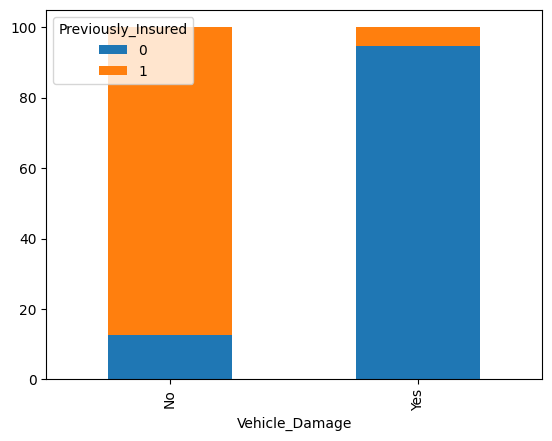

In [38]:
#plot stacked bar chart
fig13.plot(kind = 'bar',stacked = True)

##### 1. Why did you pick the specific chart?

A stacked bar chart is a type of bar chart that represents multiple categories as segments within each bar. Each bar represents a total, and the segments of the bar represent the proportion of that total contributed by different categories. This chart is useful for visualizing the composition of a whole and the contribution of individual components.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.87% of the customers with no medical damage are previously insuranced.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 14 - Correlation Heatmap

In [39]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

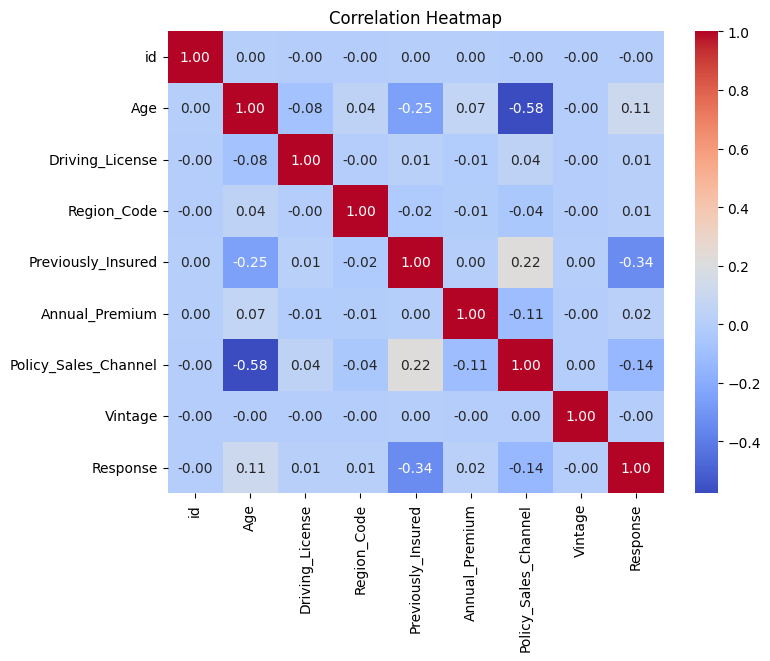

In [40]:
# Correlation Heatmap visualization code
# Compute the correlation matrix for important columns
corr = df.loc[:,['id','Age', 'Driving_License', 'Region_Code',
       'Previously_Insured','Annual_Premium','Policy_Sales_Channel',
       'Vintage', 'Response'
       ]].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Heatmap')

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heat map is a graphical representation of the correlation matrix, where correlation coefficients between variables are displayed as colors in a grid.Correlation heat maps provide a visually intuitive way to explore relationships between variables

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.Age and response are negatively correlated with previously insuranced.

2.Remaining columns dont have correlation.

3.This chart is helpful in feature selection.

#### Chart - 15 - Pair Plot

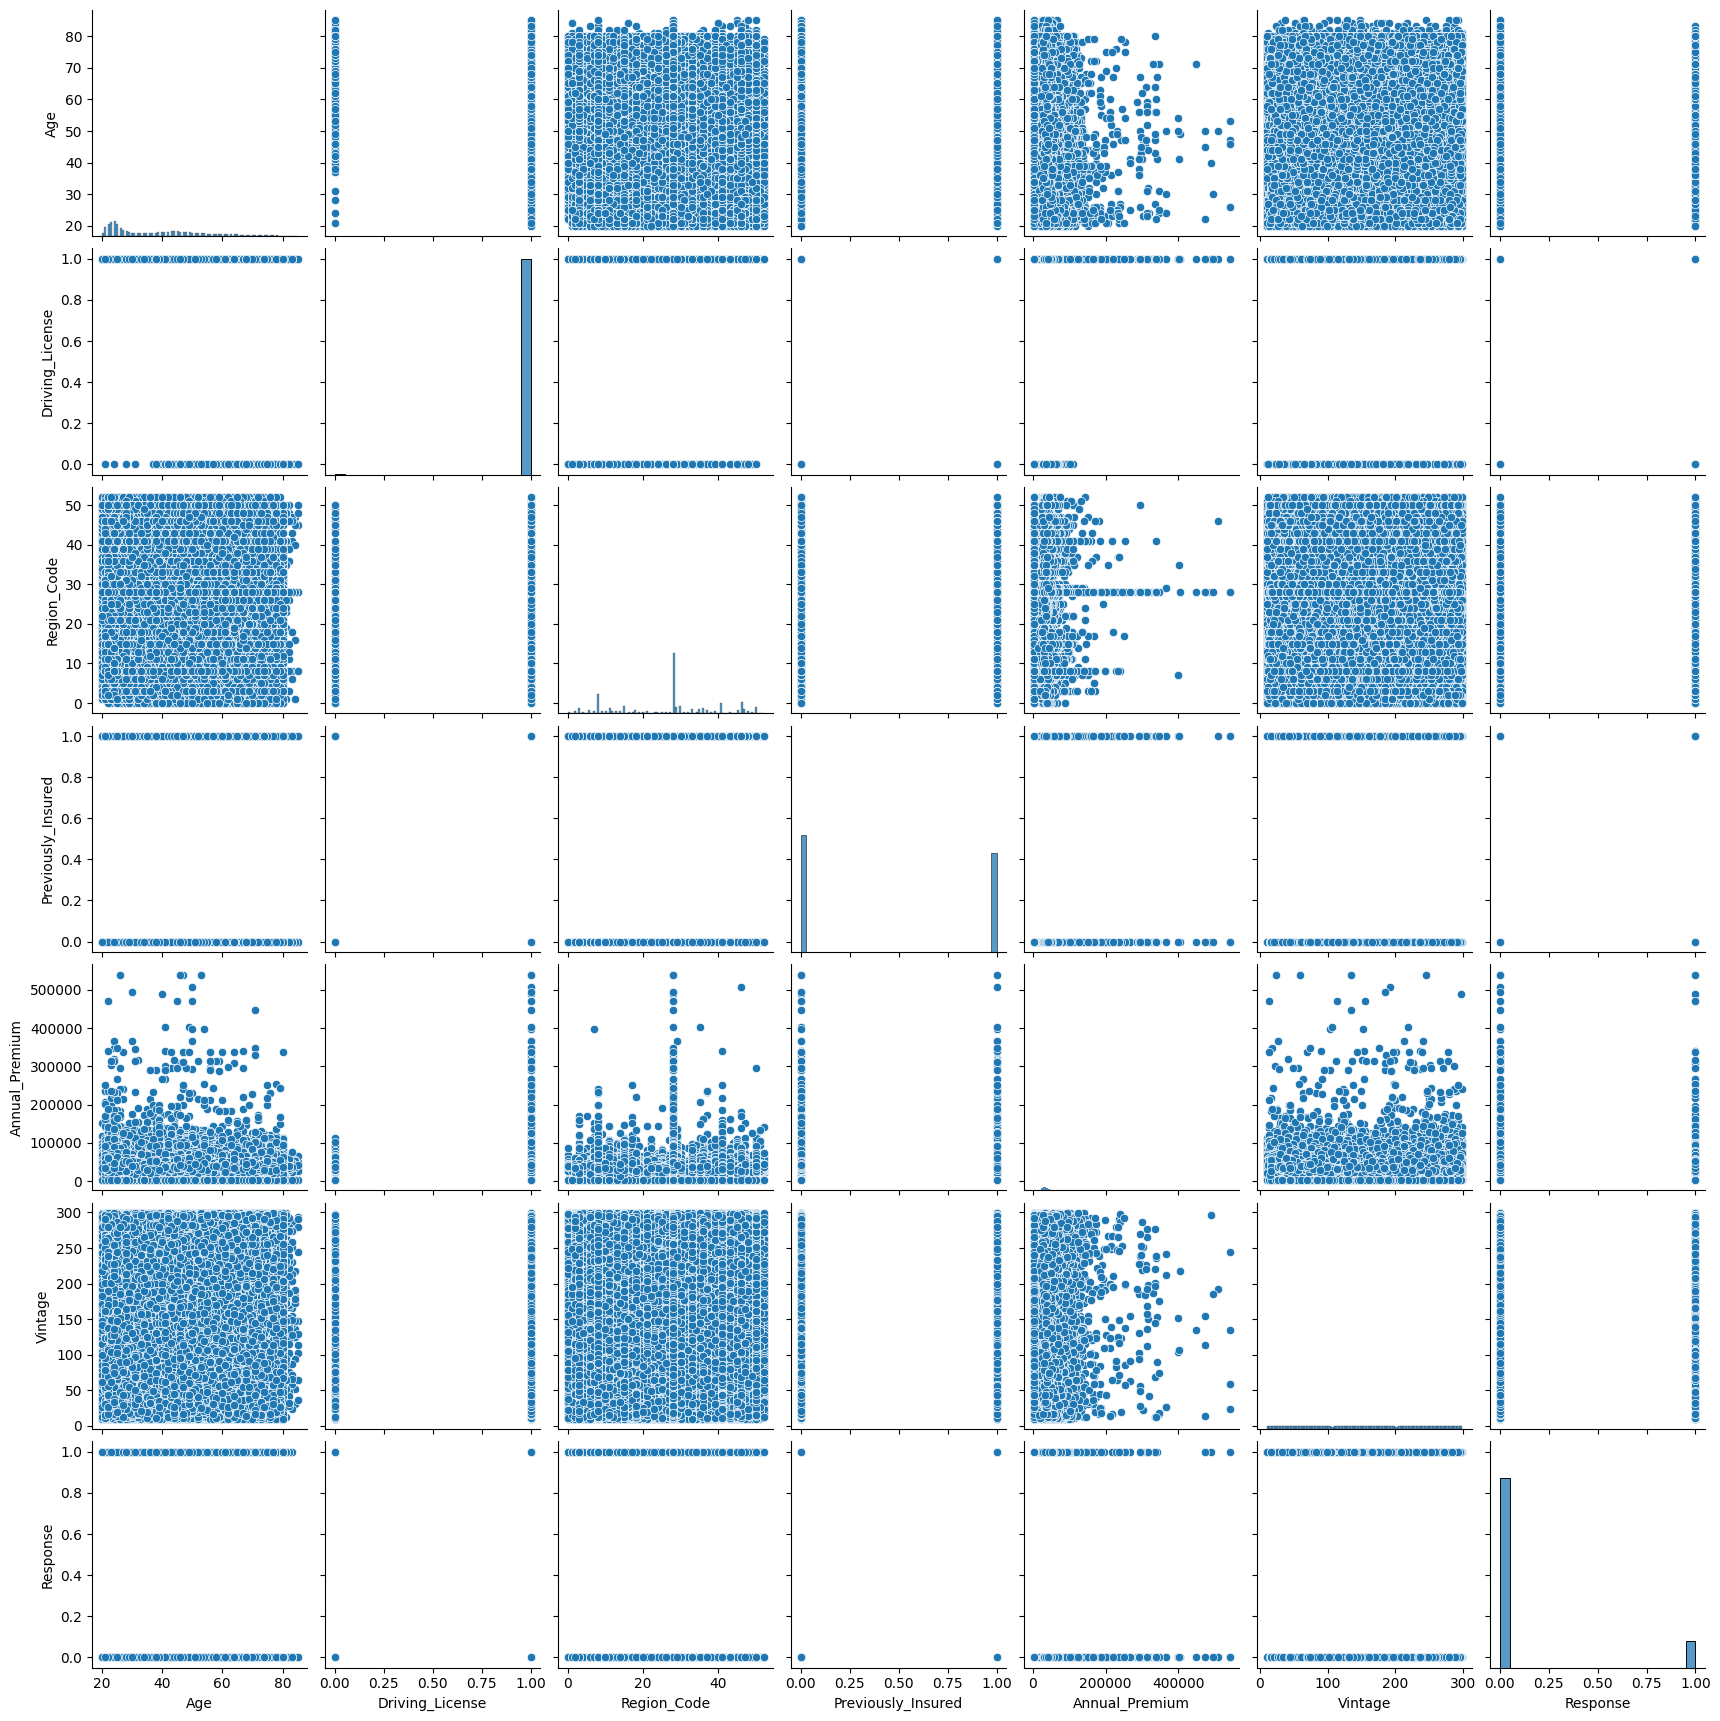

In [41]:
# Pair Plot visualization code
sns.pairplot(df.loc[:,['Age', 'Driving_License', 'Region_Code',
       'Previously_Insured','Annual_Premium',
       'Vintage', 'Response'
       ]])

##### 1. Why did you pick the specific chart?

Pair plots, also known as scatterplot matrices, are a useful visualization tool for exploring relationships between multiple variables in a dataset.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.Age and response have relation with previously insuranced.

2.Remaining columns dont have relation.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

The three hypothetical statements are

1.Male customers are more likely to buy health insurance than Female.

2.Mean of the annual premium is more than 40000.

3.Customers who have damaged vehicles don't want to get the health insurance.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis : Male customers are more likely to buy health insurance than Female.

Alternate hypothesis:Male customers are not more likely to buy health insurance than Female.

#### 2. Perform an appropriate statistical test.

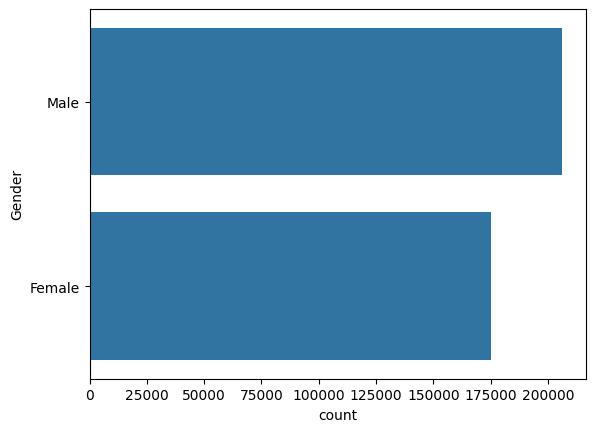

In [42]:
#code for first statement
df_Response = df[df['Response'] == 'yes']
sns.countplot(y=df['Gender'], data= df_Response)
plt.show()

From the above,It can say that Null hypothesis is true.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: Mean of the annual premium is more than 40000.

Alternate hypothesis: Mean of annual premium is less than or equal to 40000.

#### 2. Perform an appropriate statistical test.

In [43]:
#code for second statement
df['Annual_Premium'].mean()

30564.389581458323

From the above, Null hypothesis is false.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis : Customers who have damaged vehicles don't want to get the health insurance.

Alternate hypothesis : Customers who have damaged vehicles  want to get the health insurance.

#### 2. Perform an appropriate statistical test.

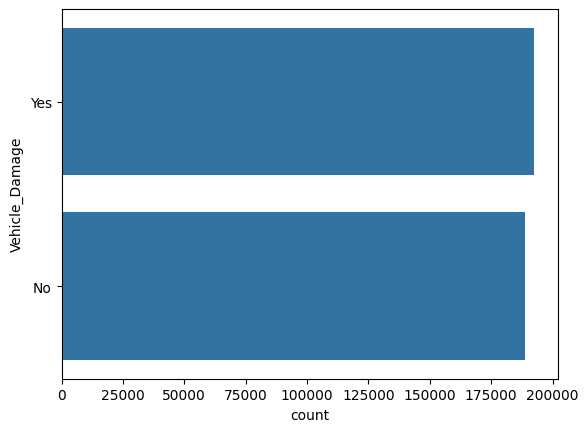

In [44]:
#code for third statement
df_Vehicle_Damage = df[df['Response'] == 'yes']
sns.countplot(y=df['Vehicle_Damage'], data= df_Vehicle_Damage)
plt.show()

From the above,Null hypothesis is false.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [45]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values.

### 2. Handling Outliers

In [46]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [47]:
# Handling Outliers & Outlier treatments
#find skewness for Annual premium
df['Annual_Premium'].skew()

1.7660872148961309

It is not following normal distribution.

In [48]:
#find skewness for Age
df['Age'].skew()

0.6725389977260843

It follows normal distribution

In [49]:
#statistical information for Age
df['Age'].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

In [50]:
#find mean+3*std for age column
df['Age'].mean()+3*df['Age'].std()

85.35741661961765

In [51]:
df['Age'].mean()-3*df['Age'].std()

-7.712249488954249

There are no outliers in Age column.

In [52]:
#find 25th percentile
p = np.percentile(df['Annual_Premium'],25)
#find 75th percentile
q = np.percentile(df['Annual_Premium'],75)
#IQR = 75th percentile - 25th percentile
IQR = q-p
outlier_max = q+(IQR*1.5)  #This is for finding maximum value
outlier_min = p-(IQR*1.5) #This is for finding minimum value
print(outlier_min,outlier_max)

1912.5 61892.5


In [53]:
#filter dataframe with annual premium grater than 1912.5 and less than 61892.5
df_new = df[(df['Annual_Premium']>1912.5) & (df['Annual_Premium']<61892.5)]

In [54]:
#dataframe without outliers
df_new

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


##### What all outlier treatment techniques have you used and why did you use those techniques?

1.For Age column,I used Z score removal technique because it follows normal distribution.

2.For Annual premium column.I used IQR removal technique because it is skewed distribution.

### 3. Categorical Encoding

In [55]:
df_new

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [56]:
# Encode your categorical columns
# NOW WE WILL CONVERT CATEGORICAL VALUES TO NUMERICAL VALUES
from sklearn.preprocessing import LabelEncoder


labelEncoder= LabelEncoder()
df_new['Gender'] = labelEncoder.fit_transform(df_new['Gender'])
df_new['Vehicle_Age'] = labelEncoder.fit_transform(df_new['Vehicle_Age'])
df_new['Vehicle_Damage'] = labelEncoder.fit_transform(df_new['Vehicle_Damage'])

<ipython-input-56-cc0fc2b6d6dc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Gender'] = labelEncoder.fit_transform(df_new['Gender'])
<ipython-input-56-cc0fc2b6d6dc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Vehicle_Age'] = labelEncoder.fit_transform(df_new['Vehicle_Age'])
<ipython-input-56-cc0fc2b6d6dc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [57]:
df_new

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,1,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

I used label encoding to change categorical features to numerical features.

### 4. Feature Manipulation & Selection

#### 1. Feature Selection

In [58]:
# Select your features wisely to avoid overfitting
x_1=df_new.drop(['Policy_Sales_Channel','Driving_License','Vintage','Response'],axis=1)
y_1 = df_new['Response']

In [59]:
x_1

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium
0,1,1,44,28.0,0,2,1,40454.0
1,2,1,76,3.0,0,0,0,33536.0
2,3,1,47,28.0,0,2,1,38294.0
3,4,1,21,11.0,1,1,0,28619.0
4,5,0,29,41.0,1,1,0,27496.0
...,...,...,...,...,...,...,...,...
381104,381105,1,74,26.0,1,0,0,30170.0
381105,381106,1,30,37.0,1,1,0,40016.0
381106,381107,1,21,30.0,1,1,0,35118.0
381107,381108,0,68,14.0,0,2,1,44617.0


##### What all feature selection methods have you used  and why?

I used correlation heat map to select features.The correlation map is in chart 14 of EDA.

##### Which all features you found important and why?

1.Id is not a important feature beacause it doesnt have any relationship with target variable.

2.Driving license is not an important feature because 99.7% customers have it.

3.Vintage is not an important feature because it follows uniformm distribution and it dont have correlation with target variable.

4.Remaining features are important because they have correlation with target variable.

### 5. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

1.It is imbalanced dataset because 87.7 customers not accepting plan and only 12.3 % accepting plan.

2.Normally in balanced dataset,the target variable distributes in ratio 50:50 or 60:40.

3.In this dataset the target variable distributes in ratio of 87:13

In [60]:
# IMPORTING LIBRABRIES
from imblearn.over_sampling import RandomOverSampler

# initialize RandomOverSampler
random_sample = RandomOverSampler()

# apply oversampling to the dataset
randomsample =  RandomOverSampler()
x_new,y_new = randomsample.fit_resample(x_1,y_1)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y_1)))
print('Resampled dataset shape {}'.format(Counter(y_new)))

Original dataset shape Counter({0: 325634, 1: 45155})
Resampled dataset shape Counter({1: 325634, 0: 325634})


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I used Random Over Sampler to handle imbalance dataset because it addresses this issue by oversampling the minority class or classes, essentially creating synthetic data points by randomly replicating existing minority class samples until the class distribution is more balanced. This helps in training a classifier that is less biased towards the majority class and can better generalize to unseen data.

### 6. Data Splitting

In [61]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new, test_size = 0.3, random_state = 0)

##### What data splitting ratio have you used and why?

I used 70:30 splitting ratio for training and testing.The 70:30 split is a widely used practice in machine learning for effectively training and evaluating models while guarding against overfitting and ensuring reliable performance estimates.

### 7. Data Scaling

In [62]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##### Which method have you used to scale you data and why?

We used Standardization (StandardScaler) method for Data Scaling.

Standardization Here all the features will be transformed in such a way that it will have the properties of a standard normal distribution with mean (μ) = 0 and standard deviation(σ)=l.

## ***7. ML Model Implementation***

### ML Model - 1

In [63]:
# ML Model - 1 Implementation
lr = LogisticRegression()
#fit model to both train sets
lr.fit(x_train,y_train)
# Predict on the model
lr_pred= lr.predict(x_test)
lr_prob = lr.predict_proba(x_test)[:,1]

In [64]:
#Get the recall score
recall_score(y_test, lr_pred)


0.9770616813234119

In [65]:

# Get the precision scores

test_precision = precision_score(y_test,lr_pred)
print("The precision on test data is ", (test_precision))

The precision on test data is  0.7060810310347382


In [66]:

# Get the accuracy scores
test_accuracy = accuracy_score(y_test,lr_pred)
print("The accuracy on test data is ", test_accuracy)

The accuracy on test data is  0.785444848782635


In [67]:
#Get the f1 score
f1_score(y_test, lr_pred)

0.8197578425976886

In [68]:


# Get the roc_auc_score scores
test_roc_auc_score = roc_auc_score(y_test,lr_prob)
print("The roc_auc_score on test data is ", test_roc_auc_score)

The roc_auc_score on test data is  0.8105097307853619


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[58133 39682]
 [ 2238 95328]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

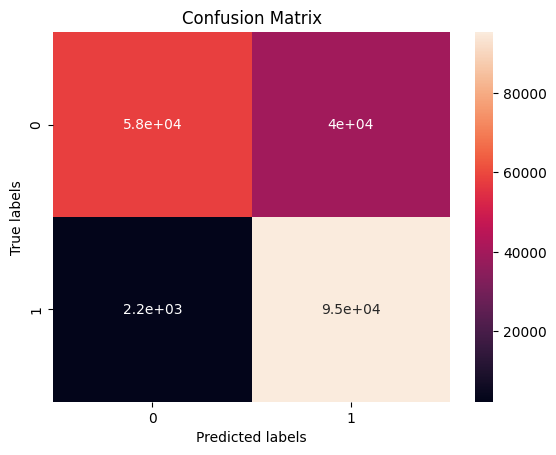

In [69]:
# Get the confusion matrix for test set



labels = ['0', '1']
cm = confusion_matrix(y_test, lr_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

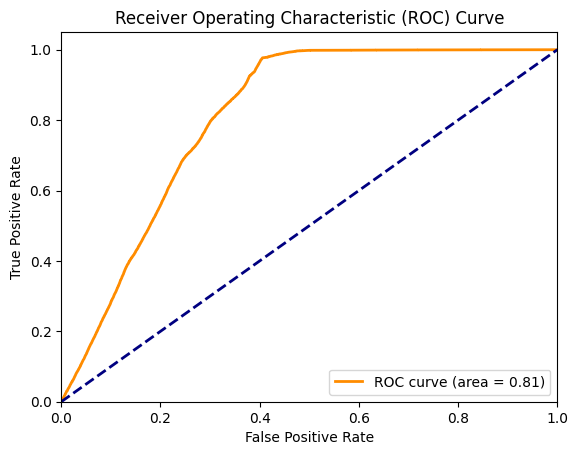

In [70]:

# Predict probabilities on the test set


# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, lr_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

I used Logistic regression model.This algorithm is used for classification problem.The important evaluation metric for this algorithm is Roc-Auc curve.Its range is [0,1].The roc score is near to 1 is good model and less than 0.5 is bad model.This model got roc score of 0.81.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [71]:
#built the model

rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(x_train,y_train)

# Predict on the model
# Making predictions on train and test data
rf_train_pred = rf_model.predict(x_train)
rf_test_pred = rf_model.predict(x_test)
rf_prob = rf_model.predict_proba(x_test)[:,1]

In [72]:
#get train accuracy and test accuracy
train_accuracy = accuracy_score(y_train,rf_train_pred)
test_accuracy = accuracy_score(y_test,rf_test_pred)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 1.0
The accuracy on test dataset is 0.9379622378839293


In [73]:
#get roc score for test set
roc_auc_score(y_test, rf_test_pred)

0.9380371952134144

In [74]:
#get roc score for train set
roc_auc_score(y_train, rf_train_pred)

1.0

[[86001 11814]
 [  307 97259]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

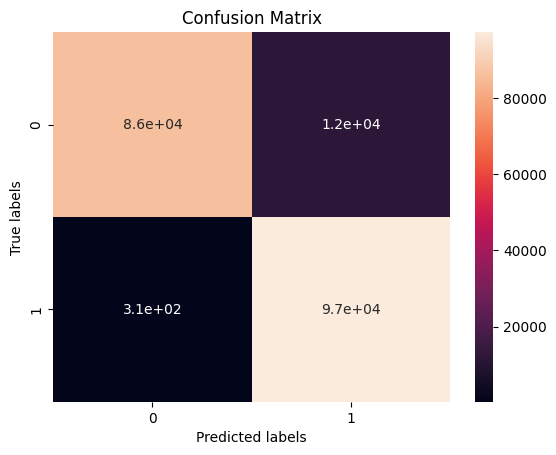

In [75]:
# Get the confusion matrix for test set



labels = ['0', '1']
cm = confusion_matrix(y_test, rf_test_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

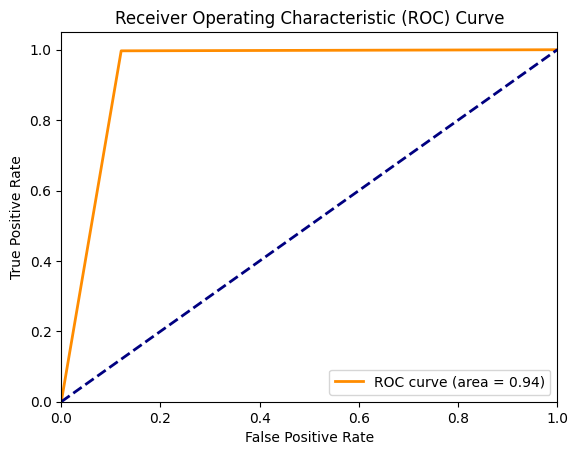

In [76]:


# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, rf_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

I used Random forest classifier.This algorithm is used for classification problem.The important evaluation metric for this algorithm is Roc-Auc curve.Its range is [0,1].The roc score is near to 1 is good model and less than 0.5 is bad model.This model got roc score of 0.94.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Accuracy:** Accuracy measures the proportion of correctly classified instances out of the total instances. It's a simple metric, but it can be misleading in imbalanced datasets where one class is much more frequent than the other. In terms of business impact, accuracy can give a general idea of how well the model is performing overall, but it might not reflect the actual performance accurately if the classes are imbalanced.

**Precision:** Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. It focuses on minimizing false positives. In a business context, precision indicates how many of the positively identified cases are actually relevant.

**Recall (Sensitivity):** Recall is the ratio of correctly predicted positive observations to all actual positives. It focuses on minimizing false negatives. In business, recall measures how many relevant cases were correctly identified.

**F1 Score:** The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall. F1 score is particularly useful when you have uneven class distribution or when false positives and false negatives have significantly different business impacts. In business, F1 score reflects the trade-off between precision and recall, aiming for a balance that optimizes overall performance.

**ROC Curve and AUC-ROC:** The ROC curve plots the true positive rate (recall) against the false positive rate (1 - specificity) at various threshold settings. The area under the ROC curve (AUC-ROC) summarizes the performance of the model across all possible thresholds. AUC-ROC measures the ability of the model to distinguish between classes. In business, AUC-ROC indicates the overall discriminative power of the model, which is crucial for decision-making systems where correctly identifying positive cases is vital.

### ML Model - 3

In [77]:
# ML Model - 3 Implementation

XG_model= XGBClassifier()
# Fit the Algorithm
XG_model= XG_model.fit(x_train, y_train)
#Making prediction
XG_pred = XG_model.predict(x_test)
XG_prob = XG_model.predict_proba(x_test)[:,1]





In [78]:
#Get the roc score
roc_auc_score(y_test, XG_prob)

0.863875752165108

In [79]:
#get the accuracy score
accuracy_score(y_test,XG_pred)

0.8108720909402655

In [80]:
#get the precission score
precision_score(y_test,XG_pred)

0.7463983739837399

In [81]:
#Get the f1 score
f1_score(y_test, XG_pred)

0.8324673793785081

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[66622 31193]
 [ 5759 91807]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

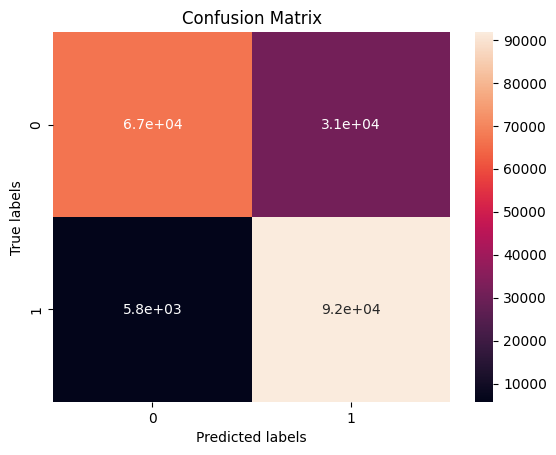

In [82]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test set



labels = ['0', '1']
cm = confusion_matrix(y_test, XG_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

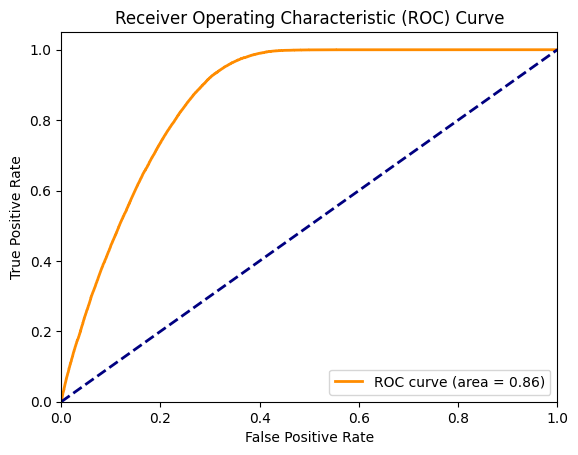

In [83]:

# Predict probabilities on the test set


# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, XG_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I consider R0c-Auc score for a positive business impact because the ROC curve plots the true positive rate (recall) against the false positive rate (1 - specificity) at various threshold settings. The area under the ROC curve (AUC-ROC) summarizes the performance of the model across all possible thresholds. AUC-ROC measures the ability of the model to distinguish between classes. In business, AUC-ROC indicates the overall discriminative power of the model, which is crucial for decision-making systems where correctly identifying positive cases is vital.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I choose Random Forest classifier from above three models because the important metric Roc-Auc score of random forest classifier is higher than other two models.

# **Conclusion**

Starting from loading our dataset, I firstly performed data cleaning and EDA.After that data prepocessing which includes missing value and outlier handling, feature selection,data imbalance handling,data splitting,feature scaling and algorithm selection. I selected logistic regression,Random forest classifier and XGB classifier.The Roc-Auc score obtained for all models was in the range of 80% to 95%. But we selected our best model as the model with an Roc-Auc score of 94% which is Random forest classifier.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***